In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 3000)
#SK LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from pickle import dump

In [2]:
df = pd.read_excel('Life Expectancy Data.xlsm')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2936 non-null   object 
 1   Year                             2936 non-null   int64  
 2   Status                           2936 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2936 non-null   int64  
 6   Alcohol                          2742 non-null   float64
 7   percentage expenditure           2936 non-null   float64
 8   Hepatitis B                      2383 non-null   float64
 9   Measles                          2936 non-null   int64  
 10   BMI                             2902 non-null   float64
 11  under-five deaths                2936 non-null   int64  
 12  Polio               

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d033400>]],
      dtype=object)

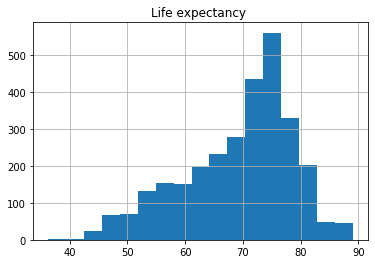

In [64]:
#plt.hist(column=df['Life expectancy '])
df.hist(column='Life expectancy ', bins =17)

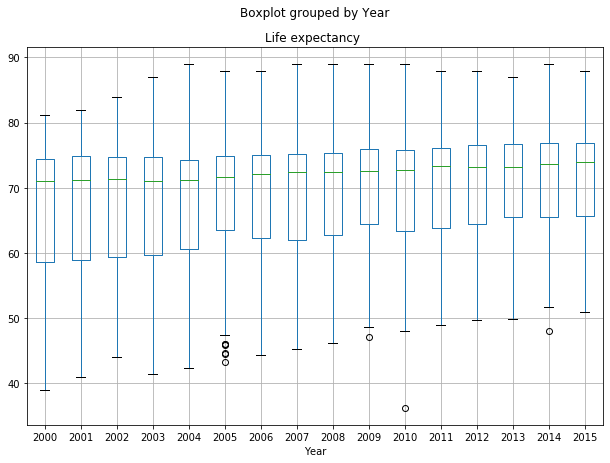

In [13]:
df.boxplot('Life expectancy ', by = 'Year',figsize=(10,7))

NameError: name 'xticks' is not defined

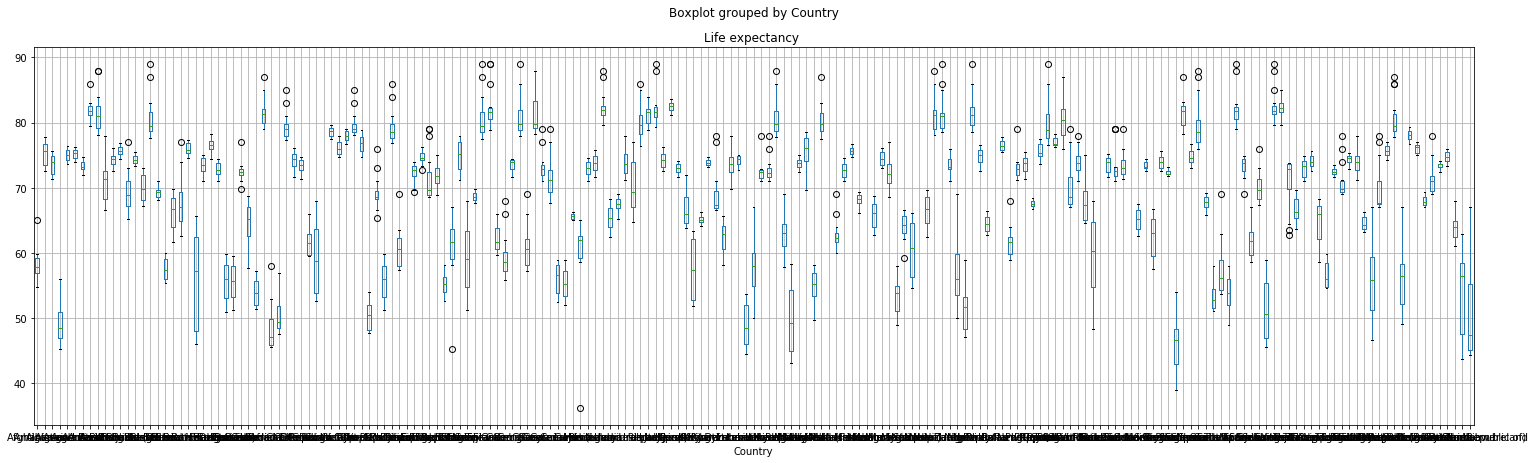

In [16]:
df.boxplot('Life expectancy ', by = 'Country',figsize=(25,7))
xticks(rotation=90) 

TypeError: cannot perform reduce with flexible type

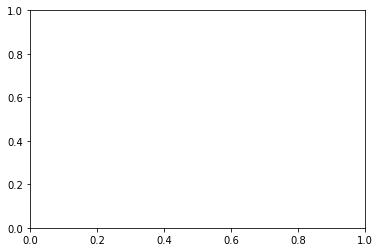

In [25]:
fig, ax = plt.subplots()
ax.boxplot(['Country'], ['Life expectancy '])
xticks(rotation=90) 
plt.show()

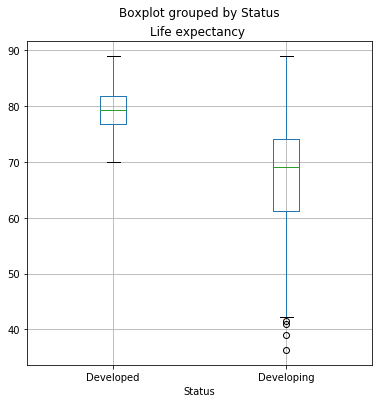

In [29]:
df.boxplot('Life expectancy ', by = 'Status',figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d5e3c10>]],
      dtype=object)

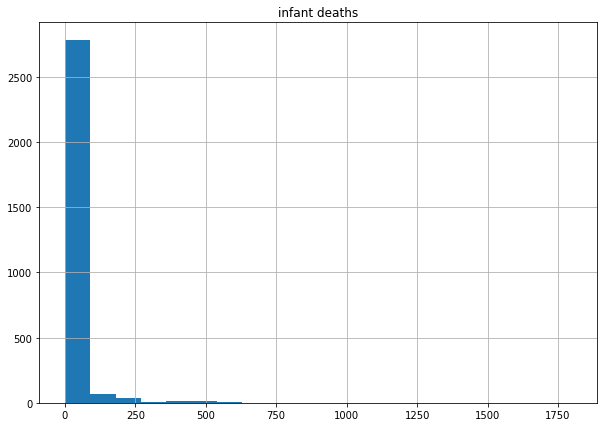

In [73]:
df.hist(column='infant deaths', bins=20,figsize=(10,7))       #Number of Infant Deaths per 1000 population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b5020a0>]],
      dtype=object)

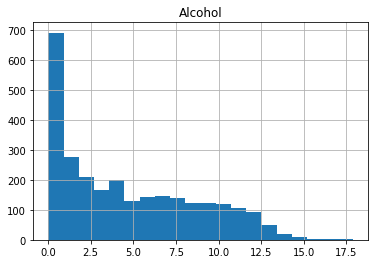

In [59]:
df.hist(column='Alcohol', bins=20)       #Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

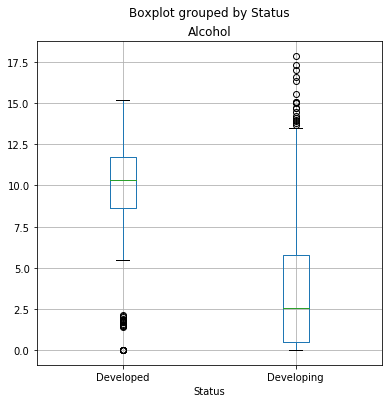

In [41]:
#plt.scatter(df['Status'],df['Alcohol'])
df.boxplot('Alcohol', by = 'Status',figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b2d79d0>]],
      dtype=object)

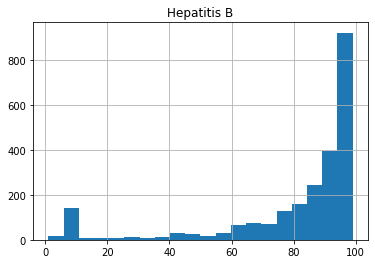

In [58]:
df.hist(column='Hepatitis B',bins=20)           #Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d934790>]],
      dtype=object)

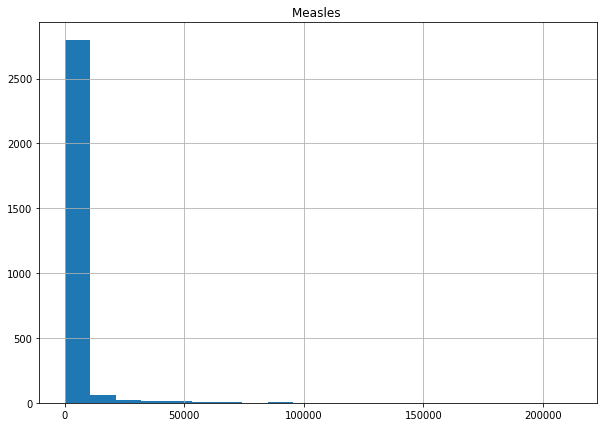

In [72]:
df.hist(column='Measles ', bins=20,figsize=(10,7)) #Measles - number of reported cases per 1000 population  *many rows with more than 1,000
                                                                                         #description might be wrong

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b339730>]],
      dtype=object)

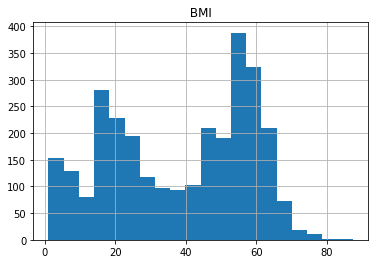

In [56]:
df.hist(column=' BMI ',bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d797cd0>]],
      dtype=object)

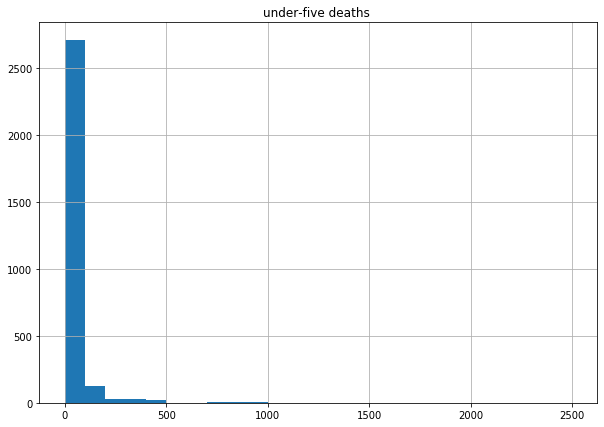

In [71]:
df.hist(column='under-five deaths ', bins=25,figsize=(10,7))   #Number of under-five deaths per 1000 population

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d11b250>]],
      dtype=object)

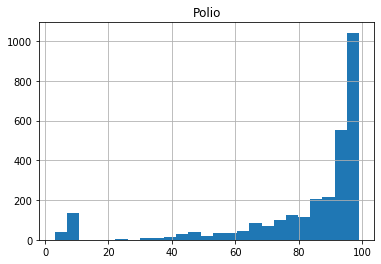

In [65]:
df.hist(column='Polio', bins=25)  #Polio (Pol3) immunization coverage among 1-year-olds (%)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d5c3c40>]],
      dtype=object)

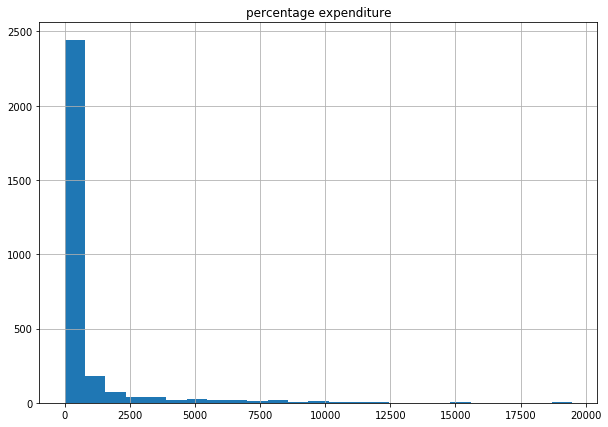

In [70]:
df.hist(column='percentage expenditure', bins=25,figsize=(10,7))  #Expenditure on health as a percentage of 
                                                           #Gross Domestic Product per capita(%)
                                                                #numbers don't look correct?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d309f70>]],
      dtype=object)

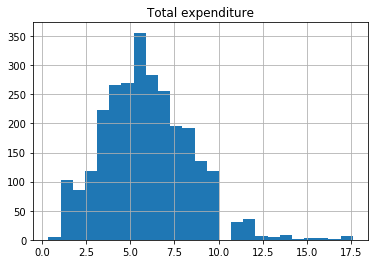

In [67]:
df.hist(column='Total expenditure', bins=25)  #General government expenditure on health 
                                                    #as a percentage of total government expenditure (%)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d490eb0>]],
      dtype=object)

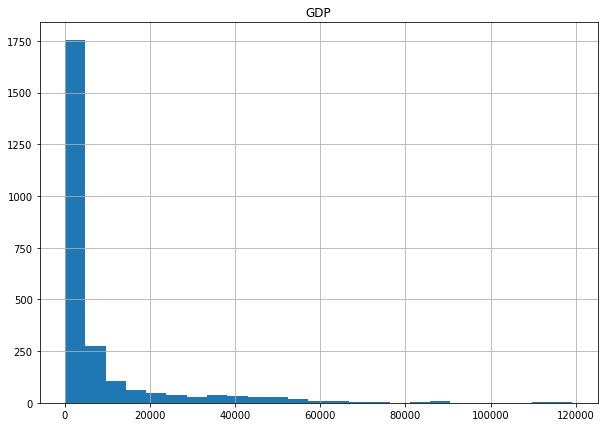

In [69]:
df.hist(column='GDP', bins=25,figsize=(10,7))   #Gross Domestic Product per capita (in USD)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13dc593a0>]],
      dtype=object)

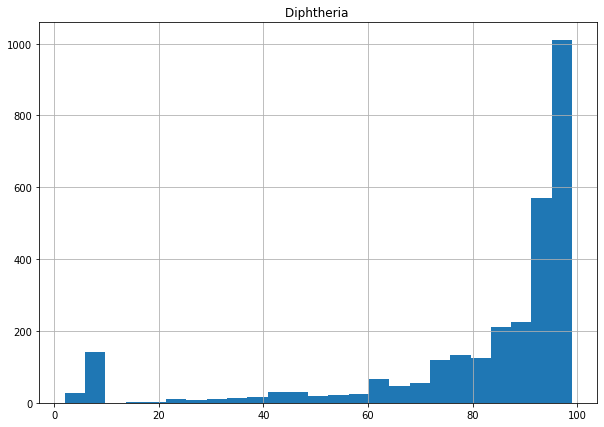

In [75]:
df.hist(column='Diphtheria ', bins=25,figsize=(10,7)) #Diphtheria tetanus toxoid and pertussis (DTP3) 
                                                        #immunization coverage among 1-year-olds (%)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13dfaa340>]],
      dtype=object)

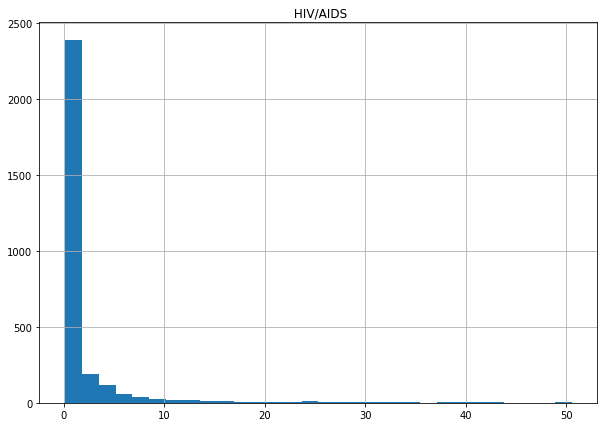

In [77]:
df.hist(column=' HIV/AIDS', bins=30,figsize=(10,7))  #Deaths per 1 000 live births HIV/AIDS (0-4 years)
plt.xlabel('Smarts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e145550>]],
      dtype=object)

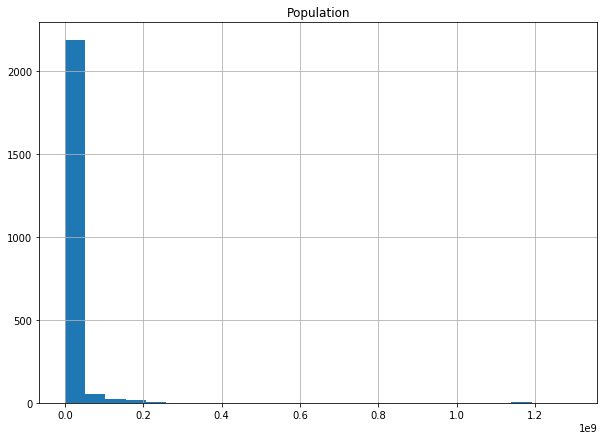

In [78]:
df.hist(column='Population', bins=25,figsize=(10,7))

In [6]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)     #need to drop population, data is messed up,
df.head()                                                                    #see 1st 3 entries, decimal is jumping around

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1411418e0>]],
      dtype=object)

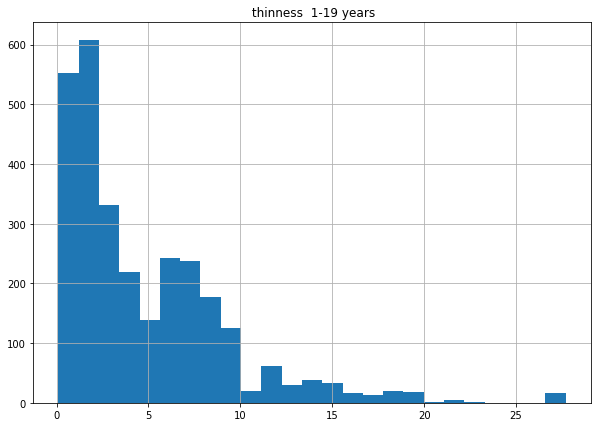

In [90]:
df.hist(column=' thinness  1-19 years', bins=25,figsize=(10,7)) #Prevalence of thinness among children 
                                                                    #and adolescents for Age 10 to 19 (%)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141154910>]],
      dtype=object)

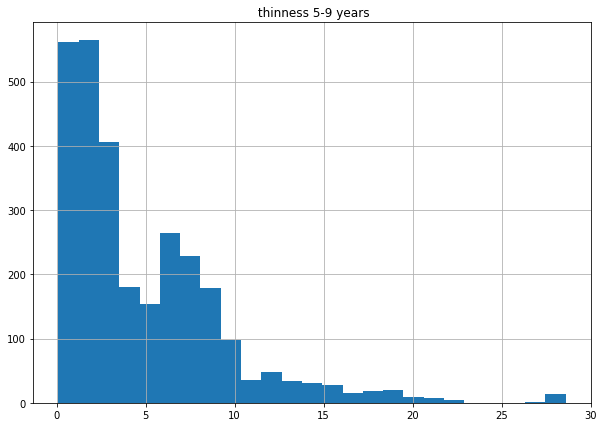

In [91]:
df.hist(column=' thinness 5-9 years', bins=25,figsize=(10,7))  #Prevalence of thinness among children for Age 5 to 9(%)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13fbc6430>]],
      dtype=object)

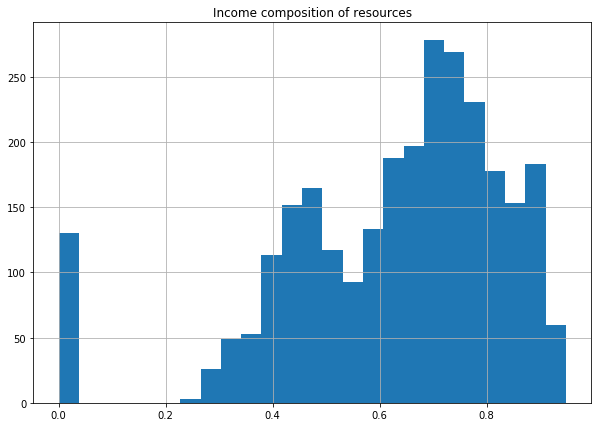

In [92]:
df.hist(column='Income composition of resources' , bins=25,figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13bd84340>]],
      dtype=object)

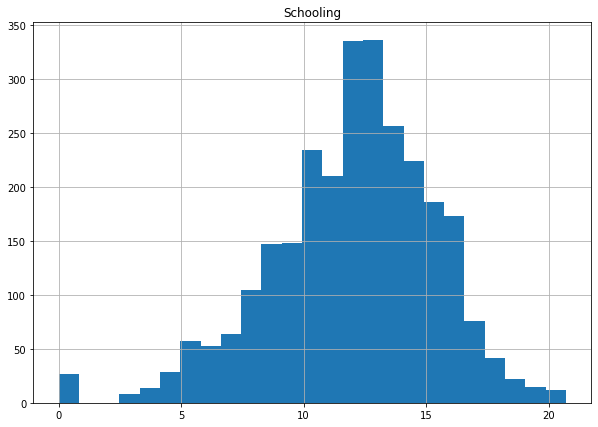

In [93]:
df.hist(column='Schooling' , bins=25,figsize=(10,7))

In [5]:
df2 = df.drop(['Population','GDP', 'percentage expenditure'], axis = 1) 
df2.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5


In [96]:
df3 = df2[df2['Year'] != 2015]
df3.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,62.000,492,18.600,86,58.000,8.180,62.000,0.100,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,64.000,430,18.100,89,62.000,8.130,64.000,0.100,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,18.200,18.200,0.454,9.500
5,Afghanistan,2010,Developing,58.800,279.000,74,0.010,66.000,1989,16.700,102,66.000,9.200,66.000,0.100,18.400,18.400,0.448,9.200
6,Afghanistan,2009,Developing,58.600,281.000,77,0.010,63.000,2861,16.200,106,63.000,9.420,63.000,0.100,18.600,18.700,0.434,8.900
7,Afghanistan,2008,Developing,58.100,287.000,80,0.030,64.000,1599,15.700,110,64.000,8.330,64.000,0.100,18.800,18.900,0.433,8.700
8,Afghanistan,2007,Developing,57.500,295.000,82,0.020,63.000,1141,15.200,113,63.000,6.730,63.000,0.100,19.000,19.100,0.415,8.400
9,Afghanistan,2006,Developing,57.300,295.000,84,0.030,64.000,1990,14.700,116,58.000,7.430,58.000,0.100,19.200,19.300,0.405,8.100
10,Afghanistan,2005,Developing,57.300,291.000,85,0.020,66.000,1296,14.200,118,58.000,8.700,58.000,0.100,19.300,19.500,0.396,7.900


In [3]:
df3.reset_index(inplace=True, drop=True)
df3.head()

NameError: name 'df3' is not defined

In [113]:
df3.to_csv('Life Expectancy Data2.csv')

In [4]:
df4 = pd.read_excel('Life Expectancy Data2.xlsm', index_col=0)
df4.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
1,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
2,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
3,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5
4,Afghanistan,2010,Developing,58.8,279,74,0.01,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,18.4,18.4,0.448,9.2
